Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('./dataset/cleaned_data.csv')

In [2]:
dataset.head()

,post_code,post_date,district,house_type,price,square,bedroom,bathroom,house_direction,has_balcony,has_furniture,has_legal_info,is_hurried
0,285164,"[datetime.datetime(2023, 12, 10, 17, 11)]",Nhà Bè,Nhà riêng,2.20,150.0,2.0,1.0,đông,False,False,True,True
1,285163,"[datetime.datetime(2023, 12, 10, 18, 40)]",Tân Bình,Nhà riêng,5.50,51.0,NaN,NaN,bắc,False,False,True,False
2,285162,"[datetime.datetime(2023, 12, 10, 18, 56)]",Phú Nhuận,Nhà,4.60,45.0,2.0,2.0,NaN,True,False,True,False
3,285161,"[datetime.datetime(2023, 12, 10, 20, 49)]",Quận 5,Nhà riêng,7.35,41.0,NaN,NaN,NaN,False,False,True,True
4,285159,"[datetime.datetime(2023, 12, 7, 14, 13)]",Tân Phú,Nhà riêng,5.00,96.0,2.0,1.0,NaN,False,False,True,False


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9370 entries, 0 to 9369
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_code        9370 non-null   int64  
 1   post_date        9370 non-null   object 
 2   district         9370 non-null   object 
 3   house_type       9370 non-null   object 
 4   price            9061 non-null   float64
 5   square           9021 non-null   float64
 6   bedroom          6941 non-null   float64
 7   bathroom         6586 non-null   float64
 8   house_direction  2996 non-null   object 
 9   has_balcony      9370 non-null   object 
 10  has_furniture    9370 non-null   bool   
 11  has_legal_info   9370 non-null   bool   
 12  is_hurried       9370 non-null   bool   
dtypes: bool(3), float64(4), int64(1), object(5)
memory usage: 759.6+ KB


In [4]:
dataset.describe(include='all')

,post_code,post_date,district,house_type,price,square,bedroom,bathroom,house_direction,has_balcony,has_furniture,has_legal_info,is_hurried
count,9370.000000,9370,9370,9370,9061.000000,9021.000000,6941.000000,6586.000000,2996,9370,9370,9370,9370
unique,NaN,9197,24,5,NaN,NaN,NaN,NaN,8,3,2,2,2
top,NaN,"[datetime.datetime(2023, 5, 8, 10, 4)]",Gò Vấp,Nhà riêng,NaN,NaN,NaN,NaN,đông,False,False,True,False
freq,NaN,3,1268,7009,NaN,NaN,NaN,NaN,1410,7817,7935,6470,7281
mean,267484.318036,NaN,NaN,NaN,8.674628,82.085846,3.653652,3.468570,NaN,NaN,NaN,NaN,NaN
std,10143.188695,NaN,NaN,NaN,13.837154,367.298906,3.682684,3.660829,NaN,NaN,NaN,NaN,NaN
min,247475.000000,NaN,NaN,NaN,0.500000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,258594.250000,NaN,NaN,NaN,4.000000,45.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN
50%,267106.500000,NaN,NaN,NaN,5.600000,60.000000,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,276660.000000,NaN,NaN,NaN,8.600000,80.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN


__Prepocessing__

Outlier Handling

In [5]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in range(len(data)):
        z_score = (data[i]-mean)/std
        if np.abs(z_score) > thres:
            outliers.append(i)
    return outliers

square_outlier_index = detect_outliers_zscore(dataset["square"])
print(f"Square outlier indices: {square_outlier_index}")

bedroom_outlier_index = detect_outliers_zscore(dataset["bedroom"])
print(f"Bedroom outlier indices: {bedroom_outlier_index}")

bathroom_outlier_index = detect_outliers_zscore(dataset["bathroom"])
print(f"Bathroom outlier indices: {bathroom_outlier_index}")

Square outlier indices: [1039, 1507, 2187, 2495, 2751, 3158, 3259, 3724, 4379, 5388, 6861, 7108, 7961, 8155]
Bedroom outlier indices: [108, 188, 319, 612, 618, 968, 984, 1070, 1329, 1341, 1476, 1512, 1513, 1540, 1826, 1845, 1958, 2053, 2170, 2563, 2564, 2681, 2832, 3158, 3259, 3298, 3536, 3557, 3751, 3889, 3892, 4016, 4128, 4148, 4445, 4511, 4684, 5066, 5084, 5196, 5471, 5705, 5749, 5767, 5834, 6132, 6887, 6945, 7126, 7191, 7265, 7612, 7881, 8052, 8140, 8176, 8217, 8239, 8332, 9075, 9318, 9346]
Bathroom outlier indices: [108, 188, 612, 618, 968, 984, 1035, 1070, 1329, 1512, 1513, 1826, 1845, 1858, 1958, 2053, 2170, 2563, 2681, 3158, 3259, 3557, 3615, 3751, 3892, 4016, 4148, 4445, 4511, 5066, 5196, 5471, 5705, 5749, 5767, 5834, 6132, 6887, 6945, 7126, 7191, 7265, 7881, 8052, 8140, 8176, 8217, 8239, 8332, 8473, 9075, 9318, 9346]


In [6]:
mean_square = np.mean(dataset["square"])
mean_bedroom = np.mean(dataset["bedroom"])
mean_bathroom = np.mean(dataset["bathroom"])

dataset.loc[square_outlier_index, "square"] = np.mean(mean_square)
dataset.loc[bedroom_outlier_index, "bedroom"] = np.mean(mean_bedroom)
dataset.loc[bathroom_outlier_index, "bathroom"] = np.mean(mean_bathroom)

Encoding and Scaling

In [7]:

from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [8]:
encoder = OrdinalEncoder()

dataset["district"] = encoder.fit_transform(dataset["district"].values.reshape(-1, 1))
dataset["house_type"] = encoder.fit_transform(dataset["house_type"].values.reshape(-1, 1))

In [9]:
dataset["has_balcony"] = encoder.fit_transform(dataset["has_balcony"].values.reshape(-1, 1))

In [10]:
dataset["has_furniture"] = dataset["has_furniture"].apply(lambda x: 1 if x is True else 0)
dataset["has_legal_info"] = dataset["has_legal_info"].apply(lambda x: 1 if x is True else 0)
dataset["is_hurried"] = dataset["is_hurried"].apply(lambda x: 1 if x is True else 0)

In [11]:
dataset.drop(['post_code', 'post_date', 'house_direction'], axis=1, inplace=True)


<Axes: >

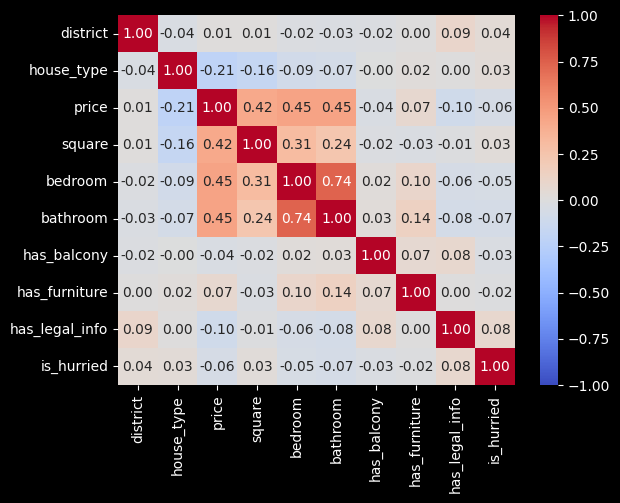

In [12]:
corr = dataset.corr(method='kendall')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmax=1, vmin=-1)  

In [13]:
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6080 entries, 0 to 9369
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        6080 non-null   float64
 1   house_type      6080 non-null   float64
 2   price           6080 non-null   float64
 3   square          6080 non-null   float64
 4   bedroom         6080 non-null   float64
 5   bathroom        6080 non-null   float64
 6   has_balcony     6080 non-null   float64
 7   has_furniture   6080 non-null   int64  
 8   has_legal_info  6080 non-null   int64  
 9   is_hurried      6080 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 522.5 KB


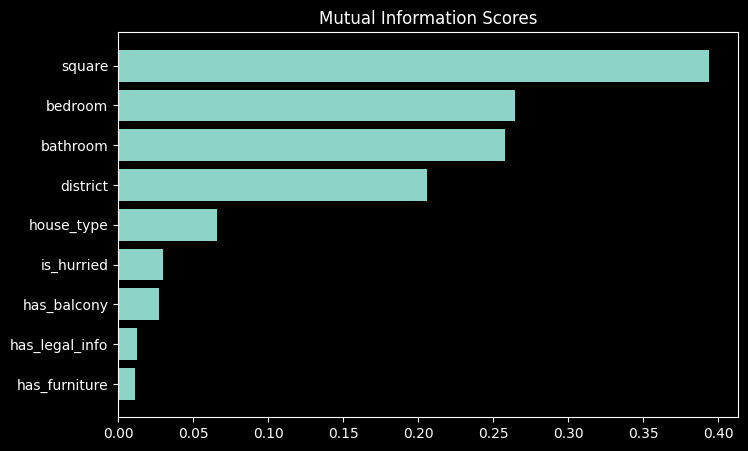

In [14]:
X = dataset.drop('price', axis=1)
y = dataset['price']  

discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Building model

In [15]:
X = dataset.drop('price', axis=1).valuesr
y = dataset['price'].values.reshape(-1, 1)  

AttributeError: 'DataFrame' object has no attribute 'valuesr'

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
model = SVR(kernel='sigmoid')
model.fit(X_train, y_train)

y_pred_val = model.predict(X_val)
y_pred_train = model.predict(X_train)

c:\Users\dangm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
mean_absolute_error(y_val, y_pred_val), mean_absolute_error(y_train, y_pred_train)

(20.62675035831696, 20.967004508401924)

In [ ]:
mean_squared_error(y_val, y_pred_val), mean_squared_error(y_train, y_pred_train)

(1792.8076185152972, 1614.6569578544295)

In [ ]:
r2_score(y_val, y_pred_val), r2_score(y_train, y_pred_train)

(-16.23123730858826, -8.674697868021788)